<a href="https://colab.research.google.com/github/Marciorochar/Analise-Preditiva/blob/main/Entrega4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== REGRESS√ÉO LINEAR OLS COM MELHORIAS ===
MAE  : 40.74
RMSE : 50.86
R¬≤   : -0.1167
                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     3.821
Date:                Sun, 22 Jun 2025   Prob (F-statistic):            0.00118
Time:                        23:33:00   Log-Likelihood:                -216.21
No. Observations:                  44   AIC:                             460.4
Df Residuals:                      30   BIC:                             485.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

/tmp/ipython-input-8-2608863909.py:57: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


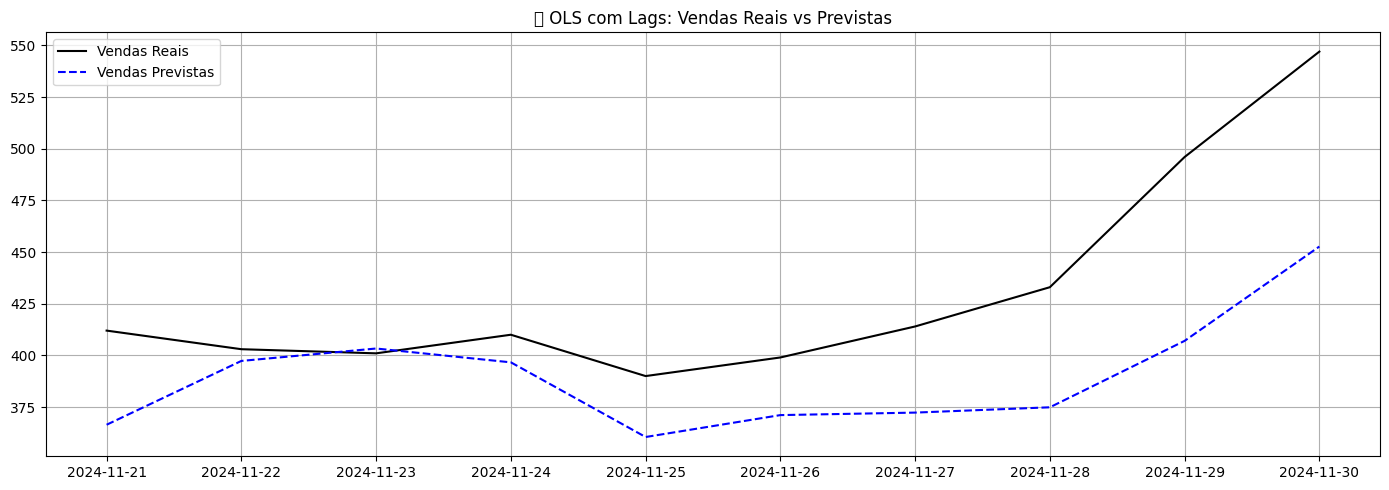

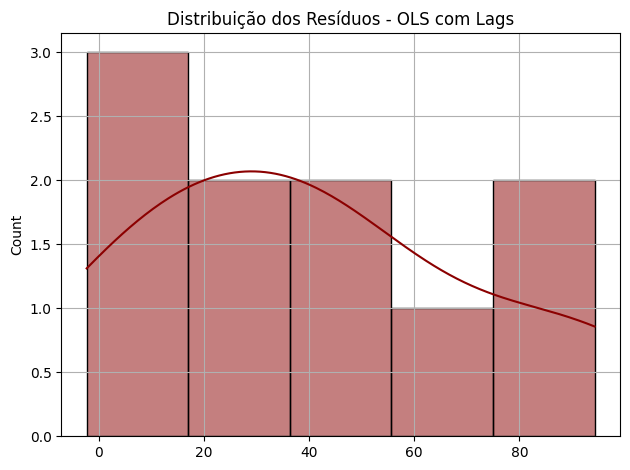


üìè Shapiro-Wilk: Estat√≠stica = 0.9376, p-valor = 0.5265
‚úÖ Res√≠duos seguem normalidade

üìå VIF (Fator de Infla√ß√£o da Vari√¢ncia):
                   Vari√°vel       VIF
5      Dia_da_Semana_Quarta       inf
4       Dia_da_Semana_Ter√ßa       inf
3     Dia_da_Semana_Segunda       inf
6      Dia_da_Semana_Quinta       inf
9   Final_de_Semana_Domingo       inf
8    Final_de_Semana_S√°bado       inf
7       Dia_da_Semana_Sexta       inf
1                       M√™s  1.879735
12              P√≥s_Feriado  1.723205
13                    lag_1  1.719110
2                       Dia  1.715989
10                  Feriado  1.538999
11          V√©spera_Feriado  1.331585
14                    lag_7  1.284902
0                       Ano  0.000000


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
# üì¶ Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import shapiro

# üì• Leitura dos Dados
df = pd.read_excel('/content/Teste_Dados_Preparados_18.06.25.xlsx', sheet_name='Dados_18.06.25')
df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data', inplace=True)

# ‚úÖ Ajustes: Feriado e vari√°veis sazonais
df['Feriado'] = df['Feriado'].replace({'Sim': 1, 'N√£o': 0, 'Feriado': 1, 'Dia comum': 0}).astype(int)
df['V√©spera_Feriado'] = df['Feriado'].shift(-1).fillna(0)
df['P√≥s_Feriado'] = df['Feriado'].shift(1).fillna(0)
df['lag_1'] = df['Vendas'].shift(1)
df['lag_7'] = df['Vendas'].shift(7)

# ‚úÖ Limpeza de linhas nulas (lags)
df.dropna(inplace=True)

# üéØ Vari√°veis
y = df['Vendas'].astype(float)
X = df.drop(columns=['Vendas', 'Fim de Semana'])  # remover colinear

# ‚öôÔ∏è Dummies + constante
X = pd.get_dummies(X, drop_first=True).astype(float)
X = sm.add_constant(X)

# üîÄ Split
n_test = int(len(df) * 0.2)
X_train, X_test = X.iloc[:-n_test], X.iloc[-n_test:]
y_train, y_test = y.iloc[:-n_test], y.iloc[-n_test:]

# üìà OLS
modelo = sm.OLS(y_train, X_train).fit()
y_pred = modelo.predict(X_test)

# üìä Avalia√ß√£o
print("=== REGRESS√ÉO LINEAR OLS COM MELHORIAS ===")
print(f"MAE  : {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R¬≤   : {r2_score(y_test, y_pred):.4f}")
print(modelo.summary())

# üìâ Gr√°fico Previs√£o
plt.figure(figsize=(14, 5))
plt.plot(y_test.index, y_test, label='Vendas Reais', color='black')
plt.plot(y_test.index, y_pred, label='Vendas Previstas', linestyle='--', color='blue')
plt.title('üìä OLS com Lags: Vendas Reais vs Previstas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# üìâ Distribui√ß√£o dos res√≠duos
residuos = y_test - y_pred
sns.histplot(residuos, kde=True, color='darkred')
plt.title('Distribui√ß√£o dos Res√≠duos - OLS com Lags')
plt.grid(True)
plt.tight_layout()
plt.show()

# üìè Normalidade
stat, p = shapiro(residuos)
print(f"\nüìè Shapiro-Wilk: Estat√≠stica = {stat:.4f}, p-valor = {p:.4f}")
print("‚úÖ Res√≠duos seguem normalidade" if p > 0.05 else "‚ö†Ô∏è Res√≠duos n√£o seguem normalidade")

# üß† VIF
vif_df = pd.DataFrame()
vif_df['Vari√°vel'] = X_train.columns
vif_df['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("\nüìå VIF (Fator de Infla√ß√£o da Vari√¢ncia):")
print(vif_df.sort_values('VIF', ascending=False))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.035e+02, tolerance: 1.149e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.902e+02, tolerance: 1.238e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.080e+03, tolerance: 1.258e

=== AVALIA√á√ÉO REGRESS√ÉO LASSO ===
Melhor alpha: 1.00000
MAE : 56.94
RMSE: 75.60
R¬≤  : -1.4677

üìå Vari√°veis Selecionadas (coef ‚â† 0):
Feriado                52.514190
Fim de Semana          25.868452
Dia_da_Semana_Sexta     9.943905
Dia                    -2.060781
M√™s                   -29.801826
dtype: float64


/tmp/ipython-input-9-136394578.py:74: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


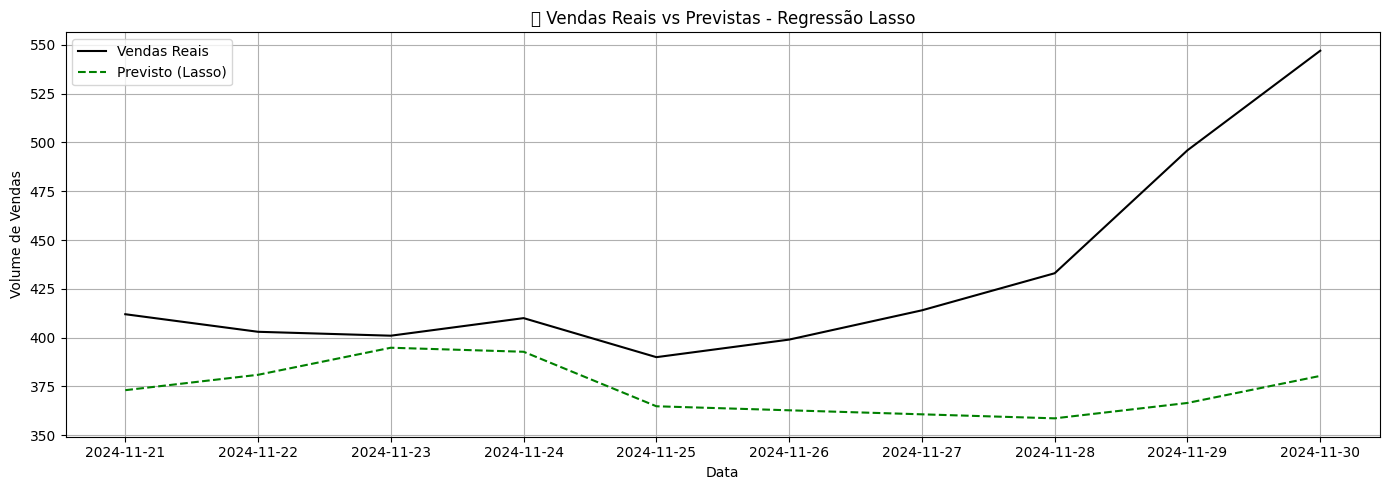

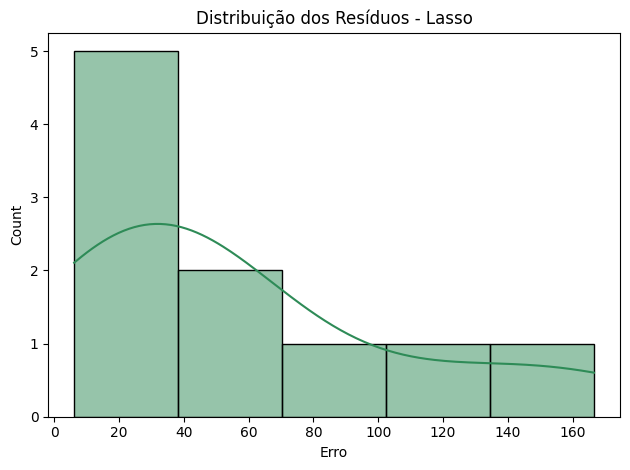


üìè Teste de Shapiro-Wilk:
Estat√≠stica = 0.8352, p-valor = 0.0386
‚ö†Ô∏è Res√≠duos N√ÉO seguem distribui√ß√£o normal.


/tmp/ipython-input-9-136394578.py:130: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


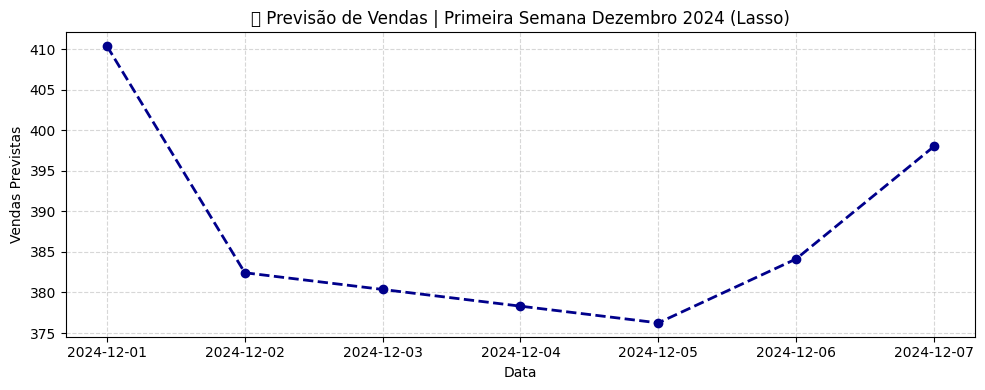


üìÖ Previs√£o de Vendas (01‚Äì07 Dezembro 2024):
            Previs√£o_Vendas
Data                       
2024-12-01       410.365476
2024-12-02       382.436243
2024-12-03       380.375463
2024-12-04       378.314682
2024-12-05       376.253901
2024-12-06       384.137026
2024-12-07       398.000793


In [ ]:
# üì¶ Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import shapiro

# üì• Leitura dos Dados
# df['Data'] = pd.to_datetime(df['Data']) # Removed as 'Data' is already the index
# df.set_index('Data', inplace=True) # Removed as 'Data' is already the index

# ‚úÖ Codifica√ß√£o bin√°ria para feriado
df['Feriado'] = df['Feriado'].replace({'Sim': 1, 'N√£o': 0, 'Feriado': 1, 'Dia comum': 0}).astype(int)

# üéØ Vari√°veis selecionadas
colunas_uteis = [
    'Ano', 'M√™s', 'Dia', 'Feriado', 'Fim de Semana',
    'Dia_da_Semana_Segunda', 'Dia_da_Semana_Ter√ßa', 'Dia_da_Semana_Quarta',
    'Dia_da_Semana_Quinta', 'Dia_da_Semana_Sexta',
    'Final_de_Semana_S√°bado', 'Final_de_Semana_Domingo'
]
X_lasso = df[colunas_uteis].astype(float)
y_lasso = df['Vendas'].astype(float)

# ‚è≥ Divis√£o treino/teste 80/20 temporal
n_test = int(len(df) * 0.2)
X_train_lasso, X_test_lasso = X_lasso.iloc[:-n_test], X_lasso.iloc[-n_test:]
y_train_lasso, y_test_lasso = y_lasso.iloc[:-n_test], y_lasso.iloc[-n_test:]

# üîß GridSearch para alpha ideal
param_grid = {'alpha': np.logspace(-4, 0, 50)}
tscv = TimeSeriesSplit(n_splits=5)

lasso_cv = GridSearchCV(
    Lasso(max_iter=10000),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=tscv
)
lasso_cv.fit(X_train_lasso, y_train_lasso)
melhor_lasso = lasso_cv.best_estimator_

# ‚úÖ Previs√£o no teste
y_pred_lasso = melhor_lasso.predict(X_test_lasso)

# üìä Avalia√ß√£o
mae_lasso = mean_absolute_error(y_test_lasso, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test_lasso, y_pred_lasso))
r2_lasso = r2_score(y_test_lasso, y_pred_lasso)

print("=== AVALIA√á√ÉO REGRESS√ÉO LASSO ===")
print(f"Melhor alpha: {lasso_cv.best_params_['alpha']:.5f}")
print(f"MAE : {mae_lasso:.2f}")
print(f"RMSE: {rmse_lasso:.2f}")
print(f"R¬≤  : {r2_lasso:.4f}")

# üîç Coeficientes relevantes
coef_lasso = pd.Series(melhor_lasso.coef_, index=X_lasso.columns)
print("\nüìå Vari√°veis Selecionadas (coef ‚â† 0):")
print(coef_lasso[coef_lasso != 0].sort_values(ascending=False))

# üìà Gr√°fico de predi√ß√£o no teste
plt.figure(figsize=(14, 5))
plt.plot(y_test_lasso.index, y_test_lasso, label='Vendas Reais', color='black')
plt.plot(y_test_lasso.index, y_pred_lasso, label='Previsto (Lasso)', linestyle='--', color='green')
plt.title('üìä Vendas Reais vs Previstas - Regress√£o Lasso')
plt.xlabel('Data')
plt.ylabel('Volume de Vendas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# üìâ Res√≠duos
residuos_lasso = y_test_lasso - y_pred_lasso
sns.histplot(residuos_lasso, kde=True, color='seagreen')
plt.title('Distribui√ß√£o dos Res√≠duos - Lasso')
plt.xlabel('Erro')
plt.tight_layout()
plt.show()

# üìè Teste de Normalidade
stat, p = shapiro(residuos_lasso)
print("\nüìè Teste de Shapiro-Wilk:")
print(f"Estat√≠stica = {stat:.4f}, p-valor = {p:.4f}")
print("‚úÖ Res√≠duos seguem distribui√ß√£o normal." if p > 0.05 else "‚ö†Ô∏è Res√≠duos N√ÉO seguem distribui√ß√£o normal.")

# üîÆ Previs√£o: 01‚Äì07 Dezembro 2024
datas_futuro = pd.date_range(start='2024-12-01', end='2024-12-07')
df_futuro = pd.DataFrame({'Data': datas_futuro})
df_futuro['Ano'] = df_futuro['Data'].dt.year
df_futuro['M√™s'] = df_futuro['Data'].dt.month
df_futuro['Dia'] = df_futuro['Data'].dt.day
df_futuro['Dia_da_Semana'] = df_futuro['Data'].dt.day_name()
df_futuro['Feriado'] = 0
df_futuro['Fim de Semana'] = df_futuro['Dia_da_Semana'].isin(['Saturday', 'Sunday']).astype(int)

# Dummies manuais
dias_dummies = {
    'Dia_da_Semana_Segunda': 'Monday',
    'Dia_da_Semana_Ter√ßa': 'Tuesday',
    'Dia_da_Semana_Quarta': 'Wednesday',
    'Dia_da_Semana_Quinta': 'Thursday',
    'Dia_da_Semana_Sexta': 'Friday',
    'Final_de_Semana_S√°bado': 'Saturday',
    'Final_de_Semana_Domingo': 'Sunday',
}
for col, dia in dias_dummies.items():
    df_futuro[col] = (df_futuro['Dia_da_Semana'] == dia).astype(int)

X_futuro = df_futuro[colunas_uteis].astype(float)
y_pred_futuro = melhor_lasso.predict(X_futuro)

# üìä Resultado final
df_resultado = pd.DataFrame({
    'Data': datas_futuro,
    'Previs√£o_Vendas': y_pred_futuro
}).set_index('Data')

# üìà Gr√°fico da Previs√£o Futura
plt.figure(figsize=(10, 4))
plt.plot(df_resultado.index, df_resultado['Previs√£o_Vendas'], marker='o', linestyle='--', color='darkblue', linewidth=2)
plt.title('üîÆ Previs√£o de Vendas | Primeira Semana Dezembro 2024 (Lasso)')
plt.xlabel('Data')
plt.ylabel('Vendas Previstas')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ‚úîÔ∏è Exibir tabela final
print("\nüìÖ Previs√£o de Vendas (01‚Äì07 Dezembro 2024):")
print(df_resultado)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.121e+02, tolerance: 1.108e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.558e+03, tolerance: 1.265e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.646e+03, tolerance: 1.279e

=== Avalia√ß√£o Regress√£o Lasso ===
üîß Melhor alpha: 1.00000
MAE  : 39.16
RMSE : 57.36
R¬≤   : -0.6665

üîç Vari√°veis Selecionadas pelo Lasso:


Feriado                66.088237
Fim de Semana          22.861045
Dia_da_Semana_Sexta     7.875211
Dia                    -0.752171
M√™s                   -12.343460
dtype: float64

/tmp/ipython-input-10-991013581.py:72: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


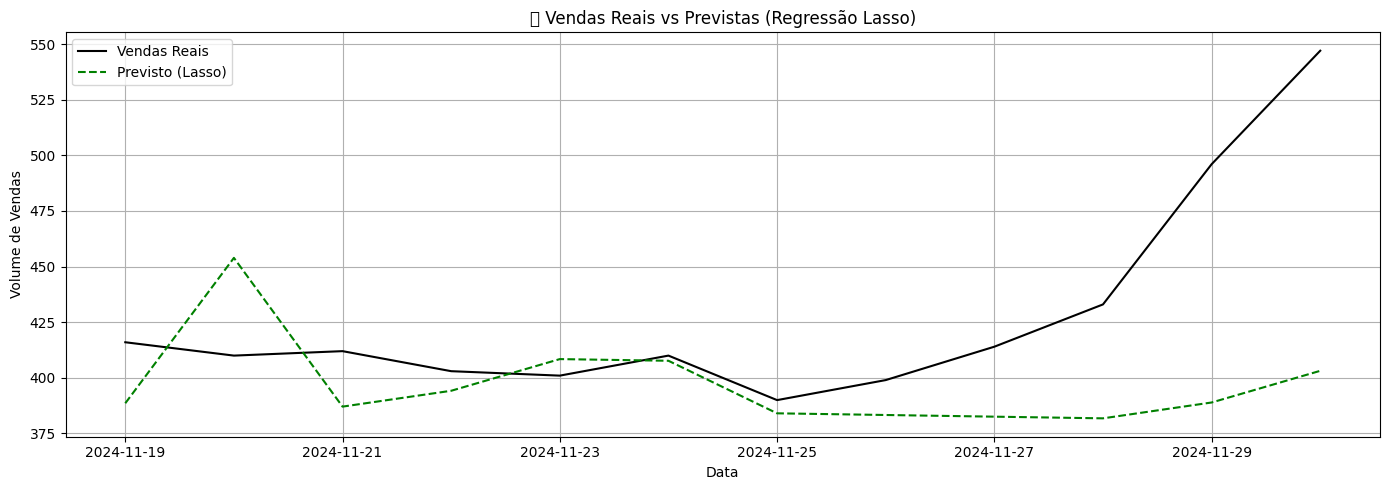

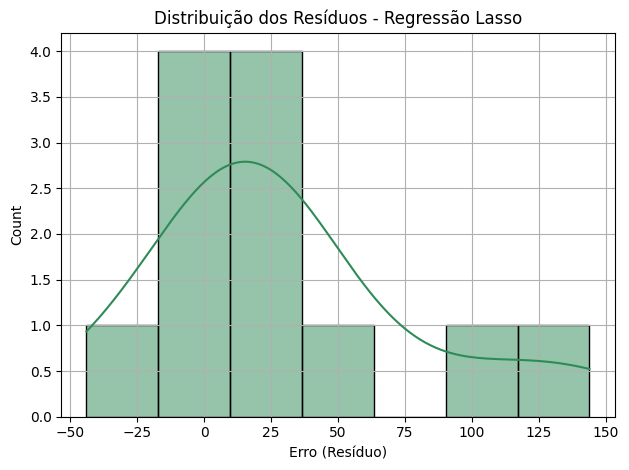


üìä Teste de Shapiro-Wilk:
Estat√≠stica = 0.8882, p-valor = 0.1116
‚úÖ Os res√≠duos seguem distribui√ß√£o normal.


/tmp/ipython-input-10-991013581.py:130: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


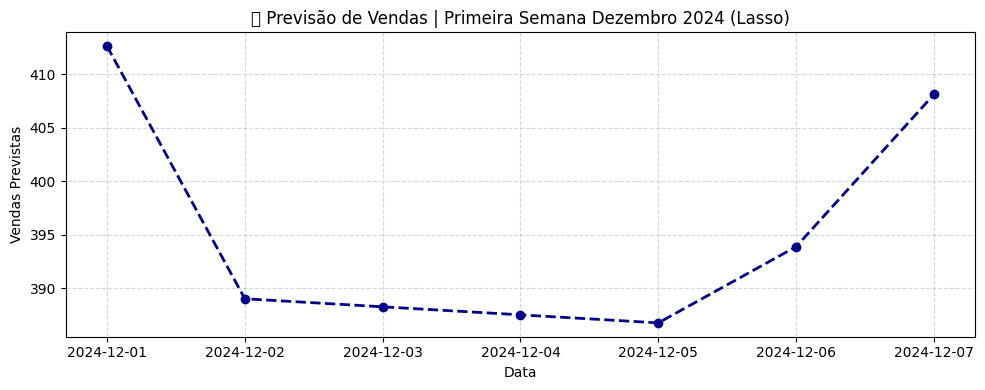


üìÖ Previs√£o de Vendas (01‚Äì07 Dezembro 2024):
            Previs√£o_Vendas
Data                       
2024-12-01       412.634899
2024-12-02       389.021684
2024-12-03       388.269513
2024-12-04       387.517342
2024-12-05       386.765171
2024-12-06       393.888212
2024-12-07       408.121875


In [ ]:
# üì¶ Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import shapiro

# üì• Leitura dos dados
df = pd.read_excel('/content/Teste_Dados_Preparados_18.06.25.xlsx', sheet_name='Dados_18.06.25')

# üìÖ Tratamento da data
df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data', inplace=True)

# üéØ Vari√°vel dependente
y_lasso = df['Vendas'].astype(float)

# ‚úÖ Vari√°veis preditoras
df['Feriado'] = df['Feriado'].replace({'Sim': 1, 'N√£o': 0, 'Feriado': 1, 'Dia comum': 0}).astype(int)
X_lasso = df.drop(columns=['Vendas']).select_dtypes(include=['int64', 'float64']).astype(float)

# ‚è≥ Divis√£o treino/teste temporal
n_test = int(len(df) * 0.2)
X_train_lasso, X_test_lasso = X_lasso.iloc[:-n_test], X_lasso.iloc[-n_test:]
y_train_lasso, y_test_lasso = y_lasso.iloc[:-n_test], y_lasso.iloc[-n_test:]

# üîç GridSearch para alpha √≥timo
param_grid = {'alpha': np.logspace(-4, 0, 50)}
tscv = TimeSeriesSplit(n_splits=5)

lasso_cv = GridSearchCV(
    estimator=Lasso(max_iter=10000),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=tscv
)
lasso_cv.fit(X_train_lasso, y_train_lasso)
melhor_lasso = lasso_cv.best_estimator_

# ‚úÖ Previs√£o
y_pred_lasso = melhor_lasso.predict(X_test_lasso)

# üìä Avalia√ß√£o
mae_lasso = mean_absolute_error(y_test_lasso, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test_lasso, y_pred_lasso))
r2_lasso = r2_score(y_test_lasso, y_pred_lasso)

print("=== Avalia√ß√£o Regress√£o Lasso ===")
print(f"üîß Melhor alpha: {lasso_cv.best_params_['alpha']:.5f}")
print(f"MAE  : {mae_lasso:.2f}")
print(f"RMSE : {rmse_lasso:.2f}")
print(f"R¬≤   : {r2_lasso:.4f}")

# üìå Coeficientes relevantes
coef_lasso = pd.Series(melhor_lasso.coef_, index=X_lasso.columns)
coef_utilizados = coef_lasso[coef_lasso != 0].sort_values(ascending=False)
print("\nüîç Vari√°veis Selecionadas pelo Lasso:")
display(coef_utilizados)

# üìà Gr√°fico: Reais vs Previstas
plt.figure(figsize=(14, 5))
plt.plot(y_test_lasso.index, y_test_lasso, label='Vendas Reais', color='black')
plt.plot(y_test_lasso.index, y_pred_lasso, label='Previsto (Lasso)', linestyle='--', color='green')
plt.title('üìä Vendas Reais vs Previstas (Regress√£o Lasso)')
plt.xlabel('Data')
plt.ylabel('Volume de Vendas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# üìâ Gr√°fico: Res√≠duos
residuos_lasso = y_test_lasso - y_pred_lasso
sns.histplot(residuos_lasso, kde=True, color='seagreen')
plt.title('Distribui√ß√£o dos Res√≠duos - Regress√£o Lasso')
plt.xlabel('Erro (Res√≠duo)')
plt.grid(True)
plt.tight_layout()
plt.show()

# üìè Teste de Normalidade
stat, p = shapiro(residuos_lasso)
print(f"\nüìä Teste de Shapiro-Wilk:")
print(f"Estat√≠stica = {stat:.4f}, p-valor = {p:.4f}")
print("‚úÖ Os res√≠duos seguem distribui√ß√£o normal." if p > 0.05 else "‚ö†Ô∏è Os res√≠duos N√ÉO seguem distribui√ß√£o normal.")

# üîÆ Previs√£o para 01‚Äì07 Dezembro 2024
datas_futuro = pd.date_range(start='2024-12-01', end='2024-12-07')
df_futuro = pd.DataFrame({'Data': datas_futuro})
df_futuro['Ano'] = df_futuro['Data'].dt.year
df_futuro['M√™s'] = df_futuro['Data'].dt.month
df_futuro['Dia'] = df_futuro['Data'].dt.day
df_futuro['Dia_da_Semana'] = df_futuro['Data'].dt.day_name()
df_futuro['Feriado'] = 0
df_futuro['Fim de Semana'] = df_futuro['Dia_da_Semana'].isin(['Saturday', 'Sunday']).astype(int)

# Dummies manuais
dias_dummies = {
    'Dia_da_Semana_Segunda': 'Monday',
    'Dia_da_Semana_Ter√ßa': 'Tuesday',
    'Dia_da_Semana_Quarta': 'Wednesday',
    'Dia_da_Semana_Quinta': 'Thursday',
    'Dia_da_Semana_Sexta': 'Friday',
    'Final_de_Semana_S√°bado': 'Saturday',
    'Final_de_Semana_Domingo': 'Sunday',
}
for col, dia in dias_dummies.items():
    df_futuro[col] = (df_futuro['Dia_da_Semana'] == dia).astype(int)

# Preencher apenas as colunas do modelo
X_futuro = df_futuro[X_lasso.columns].astype(float)
y_pred_futuro = melhor_lasso.predict(X_futuro)

# üìä Resultado final
df_resultado = pd.DataFrame({
    'Data': datas_futuro,
    'Previs√£o_Vendas': y_pred_futuro
}).set_index('Data')

# üìà Gr√°fico da Previs√£o
plt.figure(figsize=(10, 4))
plt.plot(df_resultado.index, df_resultado['Previs√£o_Vendas'], marker='o', linestyle='--', color='darkblue', linewidth=2)
plt.title('üîÆ Previs√£o de Vendas | Primeira Semana Dezembro 2024 (Lasso)')
plt.xlabel('Data')
plt.ylabel('Vendas Previstas')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ‚úîÔ∏è Exibir tabela final
print("\nüìÖ Previs√£o de Vendas (01‚Äì07 Dezembro 2024):")
print(df_resultado)


üîé Avalia√ß√£o Random Forest:
MAE : 31.36
RMSE: 52.07
R¬≤  : -0.3734
üìå Melhores Hiperpar√¢metros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


/tmp/ipython-input-11-719874242.py:66: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


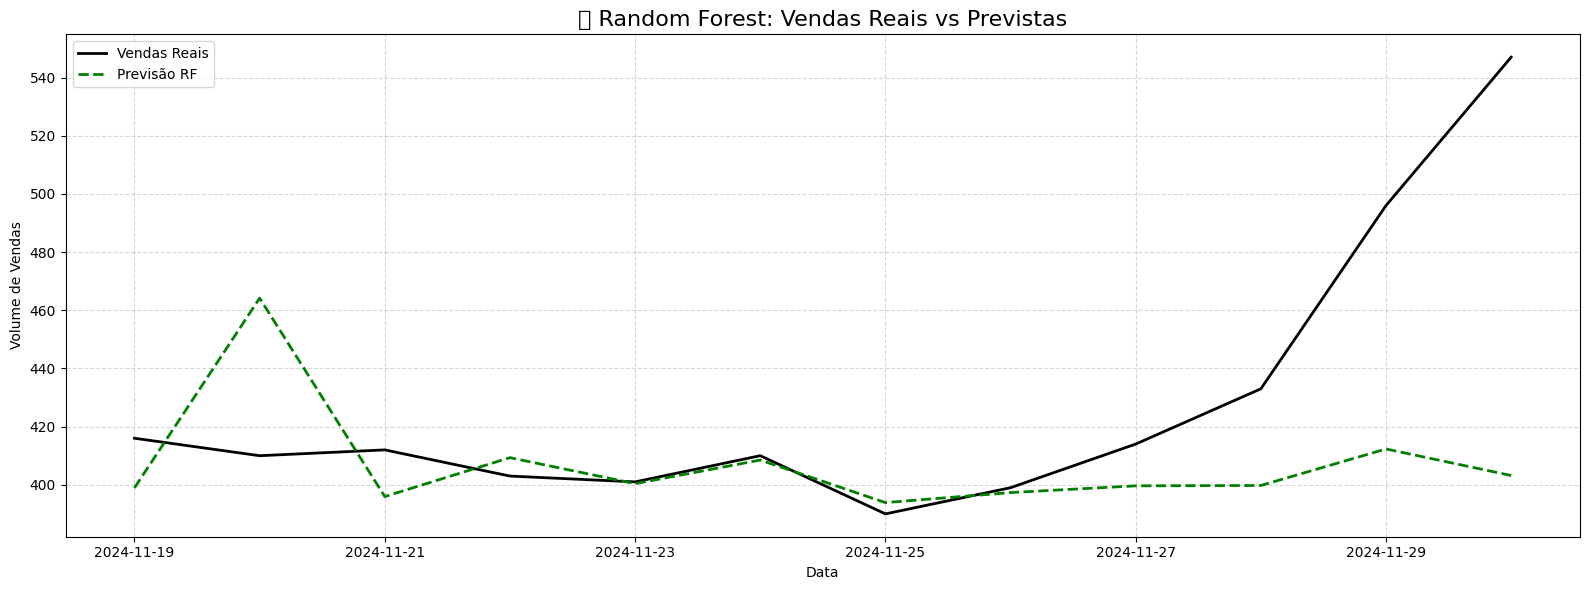

/tmp/ipython-input-11-719874242.py:76: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


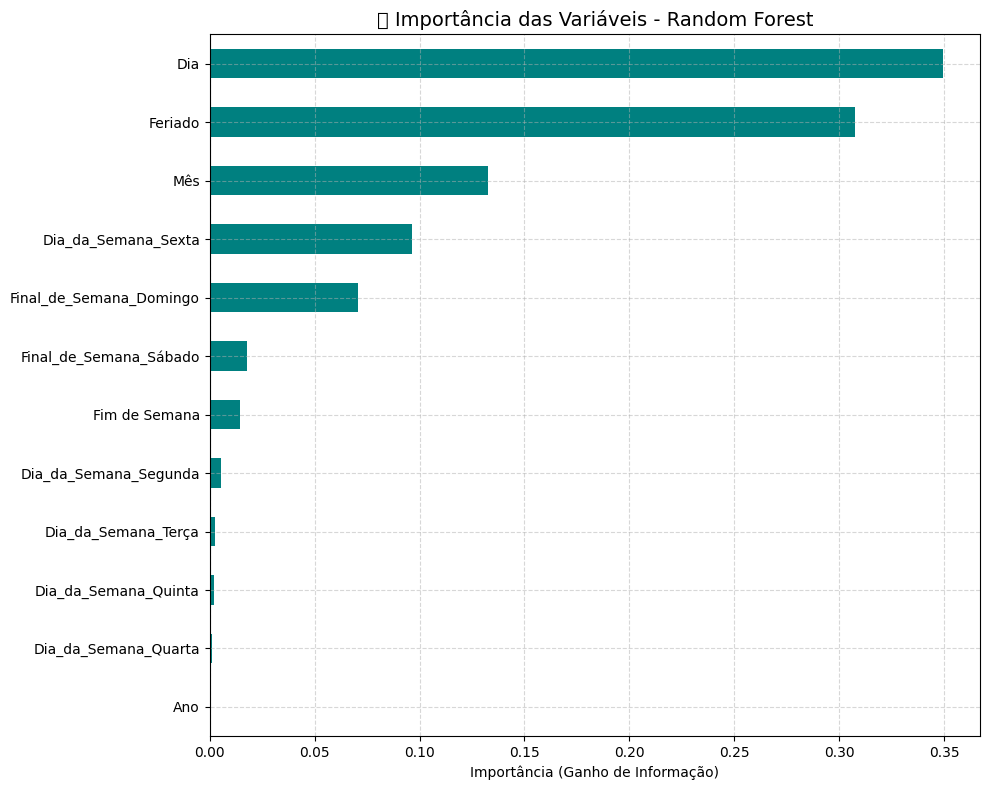

/tmp/ipython-input-11-719874242.py:114: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


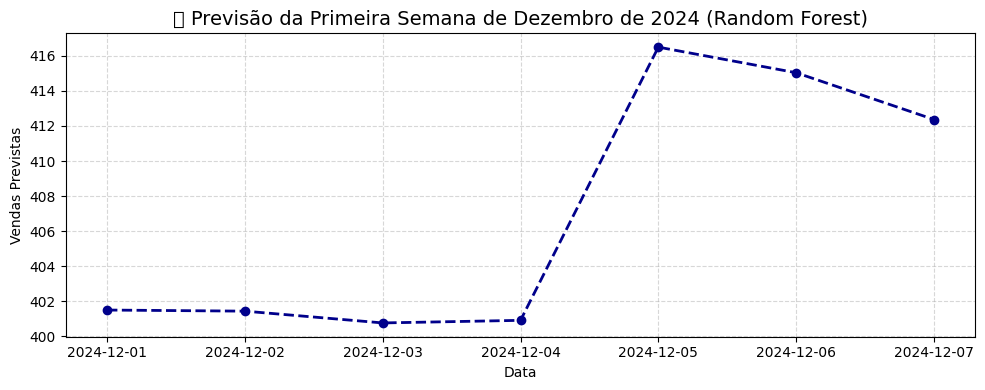


üìÖ Previs√£o de Vendas (01‚Äì07 Dezembro 2024):
            Previs√£o_Vendas
Data                       
2024-12-01       401.506119
2024-12-02       401.442786
2024-12-03       400.771357
2024-12-04       400.918976
2024-12-05       416.494516
2024-12-06       415.035373
2024-12-07       412.368516


In [ ]:
# üì¶ Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# üì• Leitura dos dados
df = pd.read_excel('/content/Teste_Dados_Preparados_18.06.25.xlsx', sheet_name='Dados_18.06.25')
df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data', inplace=True)

# ‚úÖ Vari√°veis
y = df['Vendas'].astype(float)
X = df.drop(columns=['Vendas']).select_dtypes(include=['int64', 'float64']).astype(float)

# ‚è≥ Split temporal (80/20)
n_test = int(len(df) * 0.2)
X_train, X_test = X.iloc[:-n_test], X.iloc[-n_test:]
y_train, y_test = y.iloc[:-n_test], y.iloc[-n_test:]

# üîß Grid de hiperpar√¢metros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
tscv = TimeSeriesSplit(n_splits=5)

# ‚öôÔ∏è Ajuste do modelo
rf_model = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(
    rf_model, param_grid=param_grid, cv=tscv,
    scoring='neg_mean_squared_error', n_jobs=-1
)
grid_rf.fit(X_train, y_train)
melhor_rf = grid_rf.best_estimator_

# ‚úÖ Previs√£o no teste
y_pred_rf = melhor_rf.predict(X_test)

# üìä Avalia√ß√£o
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

print("üîé Avalia√ß√£o Random Forest:")
print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R¬≤  : {r2:.4f}")
print("üìå Melhores Hiperpar√¢metros:", grid_rf.best_params_)

# üìà Gr√°fico Reais vs Previstas
plt.figure(figsize=(16, 6))
plt.plot(y_test.index, y_test, label='Vendas Reais', color='black', linewidth=2)
plt.plot(y_test.index, y_pred_rf, label='Previs√£o RF', linestyle='--', color='green', linewidth=2)
plt.title('üìä Random Forest: Vendas Reais vs Previstas', fontsize=16)
plt.xlabel('Data')
plt.ylabel('Volume de Vendas')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# üìå Import√¢ncia das Vari√°veis
importances = pd.Series(melhor_rf.feature_importances_, index=X.columns).sort_values()
plt.figure(figsize=(10, 8))
importances.plot(kind='barh', color='teal')
plt.title('üìå Import√¢ncia das Vari√°veis - Random Forest', fontsize=14)
plt.xlabel('Import√¢ncia (Ganho de Informa√ß√£o)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# üîÆ Previs√£o para 01‚Äì07 Dezembro 2024
datas_futuro = pd.date_range(start='2024-12-01', end='2024-12-07', freq='D')
df_futuro = pd.DataFrame({'Data': datas_futuro})
df_futuro['Ano'] = df_futuro['Data'].dt.year
df_futuro['M√™s'] = df_futuro['Data'].dt.month
df_futuro['Dia'] = df_futuro['Data'].dt.day
df_futuro['Dia_da_Semana'] = df_futuro['Data'].dt.day_name()

# Criar dummies compat√≠veis com o modelo
df_futuro = pd.get_dummies(df_futuro, columns=['Dia_da_Semana'], drop_first=True)

# Preencher colunas ausentes com 0
for col in X_train.columns:
    if col not in df_futuro.columns:
        df_futuro[col] = 0

# Ordenar colunas conforme o treino
X_futuro = df_futuro[X_train.columns].astype(float)

# ‚úÖ Previs√£o
y_pred_futuro = melhor_rf.predict(X_futuro)

# üìä Resultado
df_previsao = pd.DataFrame({
    'Data': datas_futuro,
    'Previs√£o_Vendas': y_pred_futuro
}).set_index('Data')

# üìà Gr√°fico Previs√£o Dezembro
plt.figure(figsize=(10, 4))
plt.plot(df_previsao.index, df_previsao['Previs√£o_Vendas'], marker='o', linestyle='--', color='darkblue', linewidth=2)
plt.title('üîÆ Previs√£o da Primeira Semana de Dezembro de 2024 (Random Forest)', fontsize=14)
plt.xlabel('Data')
plt.ylabel('Vendas Previstas')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# üìã Mostrar resultados
print("\nüìÖ Previs√£o de Vendas (01‚Äì07 Dezembro 2024):")
print(df_previsao)


# Task
Perform an exploratory data analysis on the data in the "Dados_18.06.25" sheet of the "Teste_Dados_Preparados_18.06.25.xlsx" file.

## Carregar os dados

### Subtask:
Carregar o arquivo Excel `Teste_Dados_Preparados_18.06.25.xlsx` na planilha `Dados_18.06.25` em um DataFrame.


**Reasoning**:
Load the specified sheet from the Excel file into a pandas DataFrame as requested.



In [ ]:
df = pd.read_excel('/content/Teste_Dados_Preparados_18.06.25.xlsx', sheet_name='Dados_18.06.25')

## Explora√ß√£o inicial

### Subtask:
Exibir as primeiras linhas do DataFrame, verificar os tipos de dados e identificar valores ausentes.


**Reasoning**:
Display the first few rows, check data types, and identify missing values to understand the structure and completeness of the dataframe.



In [ ]:
display(df.head())
display(df.info())
display(df.isnull().sum())

Data   Ano  M√™s  Dia  Vendas  Dia_da_Semana_Segunda  \
0 2024-10-01  2024   10    1     392                      0   
1 2024-10-02  2024   10    2     393                      0   
2 2024-10-03  2024   10    3     391                      0   
3 2024-10-04  2024   10    4     395                      0   
4 2024-10-05  2024   10    5     422                      0   

   Dia_da_Semana_Ter√ßa  Dia_da_Semana_Quarta  Dia_da_Semana_Quinta  \
0                    1                     0                     0   
1                    0                     1                     0   
2                    0                     0                     1   
3                    0                     0                     0   
4                    0                     0                     0   

   Dia_da_Semana_Sexta  Final_de_Semana_S√°bado  Final_de_Semana_Domingo  \
0                    0                       0                        0   
1                    0                       0                        0   
2                    0                       0                        0   
3                    1                       0                        0   
4                    0                       1                        0   

   Feriado  Fim de Semana  
0        0              0  
1        0              0  
2        0              0  
3        0              0  
4        0              1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     61 non-null     datetime64[ns]
 1   Ano                      61 non-null     int64         
 2   M√™s                      61 non-null     int64         
 3   Dia                      61 non-null     int64         
 4   Vendas                   61 non-null     int64         
 5   Dia_da_Semana_Segunda    61 non-null     int64         
 6   Dia_da_Semana_Ter√ßa      61 non-null     int64         
 7   Dia_da_Semana_Quarta     61 non-null     int64         
 8   Dia_da_Semana_Quinta     61 non-null     int64         
 9   Dia_da_Semana_Sexta      61 non-null     int64         
 10  Final_de_Semana_S√°bado   61 non-null     int64         
 11  Final_de_Semana_Domingo  61 non-null     int64         
 12  Feriado                  61 non-nul

None

Data                       0
Ano                        0
M√™s                        0
Dia                        0
Vendas                     0
Dia_da_Semana_Segunda      0
Dia_da_Semana_Ter√ßa        0
Dia_da_Semana_Quarta       0
Dia_da_Semana_Quinta       0
Dia_da_Semana_Sexta        0
Final_de_Semana_S√°bado     0
Final_de_Semana_Domingo    0
Feriado                    0
Fim de Semana              0
dtype: int64

## An√°lise descritiva

### Subtask:
Calcular estat√≠sticas descritivas para as colunas num√©ricas e analisar a distribui√ß√£o das vari√°veis categ√≥ricas.


**Reasoning**:
Generate descriptive statistics for numerical columns and analyze the distribution of categorical variables as per the instructions.



=== Estat√≠sticas Descritivas para Colunas Num√©ricas ===


Data     Ano        M√™s        Dia      Vendas  \
count                   61    61.0  61.000000  61.000000   61.000000   
mean   2024-10-31 00:00:00  2024.0  10.491803  15.754098  415.180328   
min    2024-10-01 00:00:00  2024.0  10.000000   1.000000  372.000000   
25%    2024-10-16 00:00:00  2024.0  10.000000   8.000000  393.000000   
50%    2024-10-31 00:00:00  2024.0  10.000000  16.000000  403.000000   
75%    2024-11-15 00:00:00  2024.0  11.000000  23.000000  412.000000   
max    2024-11-30 00:00:00  2024.0  11.000000  31.000000  661.000000   
std                    NaN     0.0   0.504082   8.880045   50.771550   

       Dia_da_Semana_Segunda  Dia_da_Semana_Ter√ßa  Dia_da_Semana_Quarta  \
count              61.000000            61.000000             61.000000   
mean                0.131148             0.147541              0.147541   
min                 0.000000             0.000000              0.000000   
25%                 0.000000             0.000000              0.000000   
50%                 0.000000             0.000000              0.000000   
75%                 0.000000             0.000000              0.000000   
max                 1.000000             1.000000              1.000000   
std                 0.340363             0.357588              0.357588   

       Dia_da_Semana_Quinta  Dia_da_Semana_Sexta  Final_de_Semana_S√°bado  \
count             61.000000            61.000000               61.000000   
mean               0.147541             0.147541                0.147541   
min                0.000000             0.000000                0.000000   
25%                0.000000             0.000000                0.000000   
50%                0.000000             0.000000                0.000000   
75%                0.000000             0.000000                0.000000   
max                1.000000             1.000000                1.000000   
std                0.357588             0.357588                0.357588   

       Final_de_Semana_Domingo    Feriado  Fim de Semana  
count                61.000000  61.000000      61.000000  
mean                  0.131148   0.065574       0.278689  
min                   0.000000   0.000000       0.000000  
25%                   0.000000   0.000000       0.000000  
50%                   0.000000   0.000000       0.000000  
75%                   0.000000   0.000000       1.000000  
max                   1.000000   1.000000       1.000000  
std                   0.340363   0.249590       0.452075


=== Distribui√ß√£o das Vari√°veis Categ√≥ricas ===

--- Dia_da_Semana_Segunda ---


Dia_da_Semana_Segunda
0    53
1     8
Name: count, dtype: int64


--- Dia_da_Semana_Ter√ßa ---


Dia_da_Semana_Ter√ßa
0    52
1     9
Name: count, dtype: int64


--- Dia_da_Semana_Quarta ---


Dia_da_Semana_Quarta
0    52
1     9
Name: count, dtype: int64


--- Dia_da_Semana_Quinta ---


Dia_da_Semana_Quinta
0    52
1     9
Name: count, dtype: int64


--- Dia_da_Semana_Sexta ---


Dia_da_Semana_Sexta
0    52
1     9
Name: count, dtype: int64


--- Final_de_Semana_S√°bado ---


Final_de_Semana_S√°bado
0    52
1     9
Name: count, dtype: int64


--- Final_de_Semana_Domingo ---


Final_de_Semana_Domingo
0    53
1     8
Name: count, dtype: int64


--- Feriado ---


Feriado
0    57
1     4
Name: count, dtype: int64


--- Fim de Semana ---


Fim de Semana
0    44
1    17
Name: count, dtype: int64


=== Visualiza√ß√£o da Distribui√ß√£o de Vendas ===


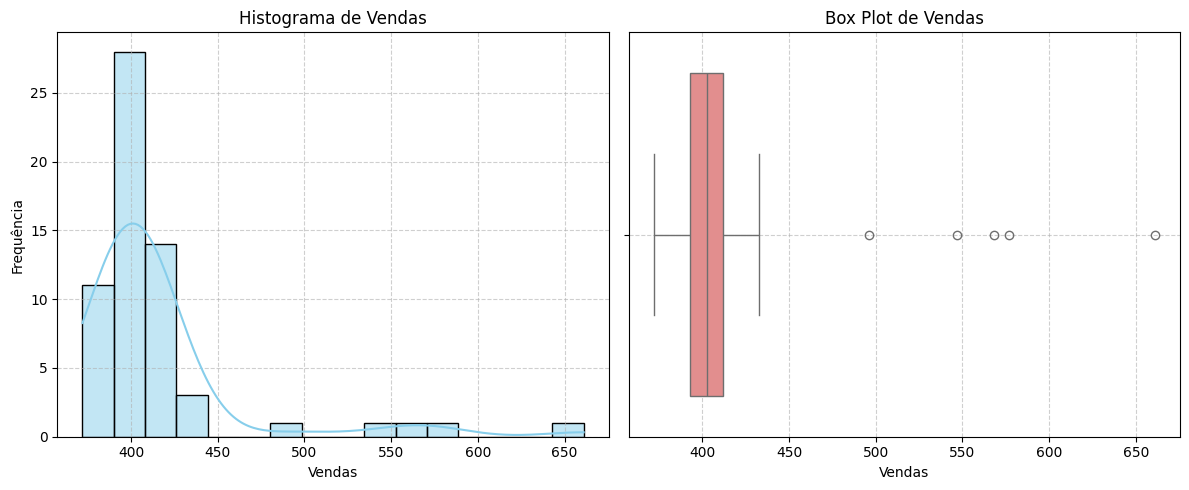


=== Visualiza√ß√£o da Contagem de Vari√°veis Categ√≥ricas ===


/tmp/ipython-input-14-1629115135.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


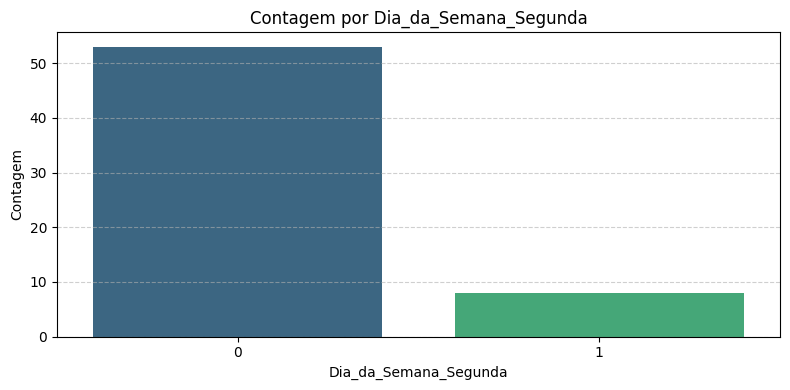

/tmp/ipython-input-14-1629115135.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


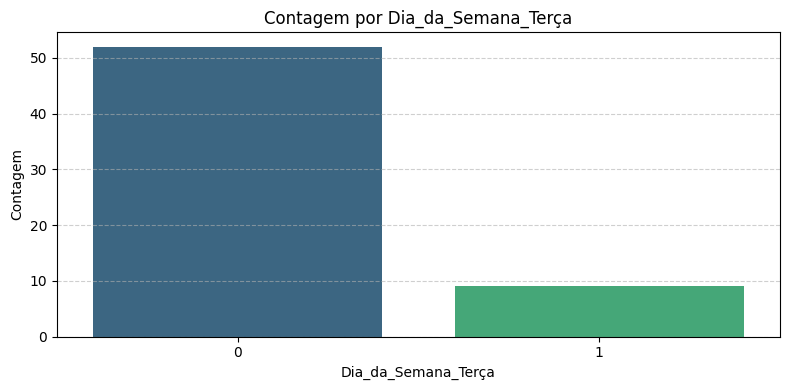

/tmp/ipython-input-14-1629115135.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


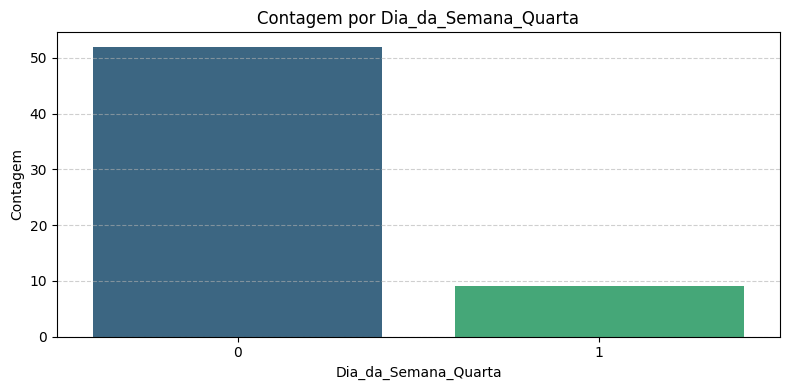

/tmp/ipython-input-14-1629115135.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


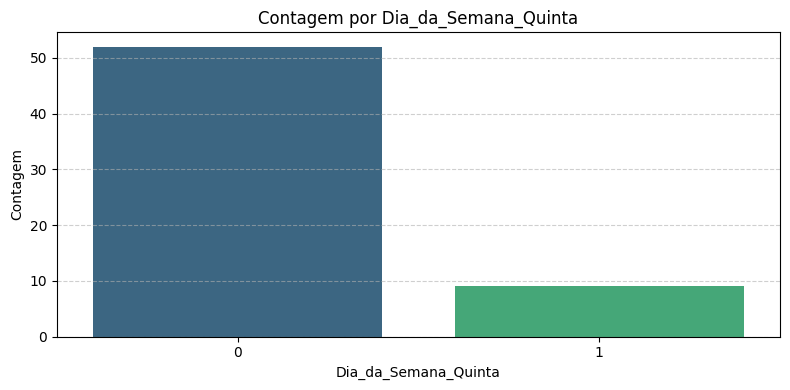

/tmp/ipython-input-14-1629115135.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


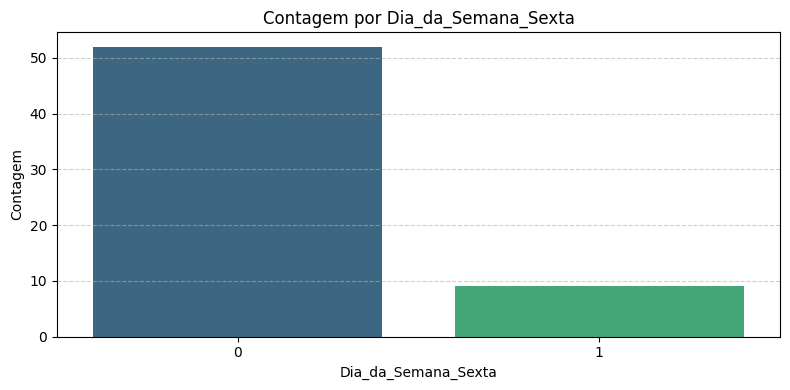

/tmp/ipython-input-14-1629115135.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


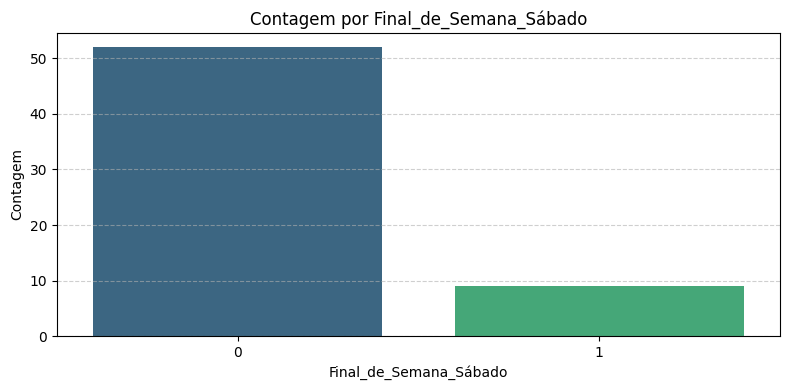

/tmp/ipython-input-14-1629115135.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


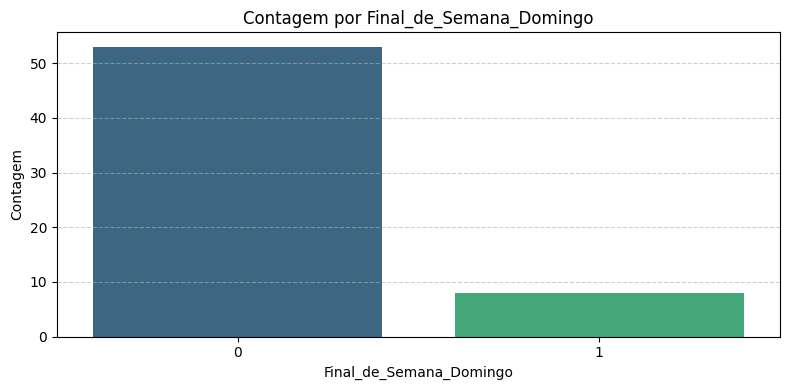

/tmp/ipython-input-14-1629115135.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


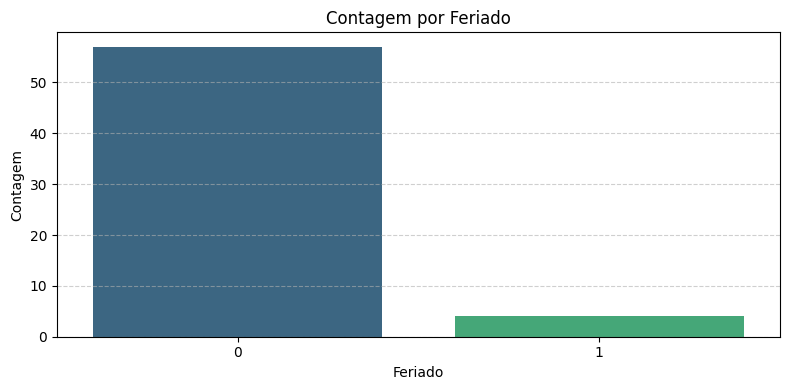

/tmp/ipython-input-14-1629115135.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


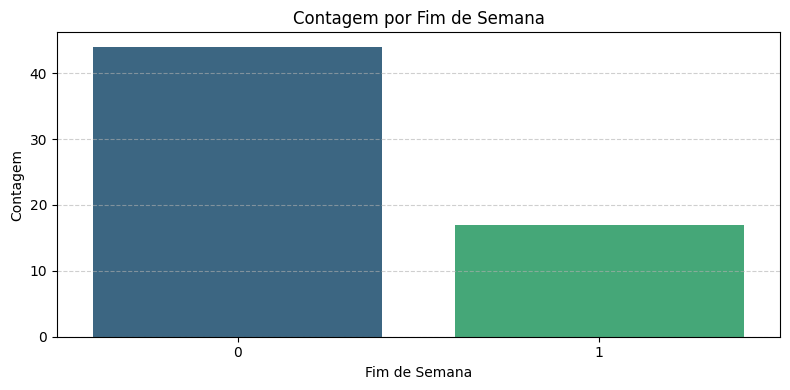

In [ ]:
# 1. Estat√≠sticas descritivas para colunas num√©ricas
print("=== Estat√≠sticas Descritivas para Colunas Num√©ricas ===")
display(df.describe())

# Identificar colunas categ√≥ricas (assumindo que colunas com 'Dia_da_Semana', 'Final_de_Semana', 'Feriado', 'Fim de Semana' s√£o categ√≥ricas)
categorical_cols = [col for col in df.columns if 'Dia_da_Semana' in col or 'Final_de_Semana' in col or col in ['Feriado', 'Fim de Semana']]

# 2. An√°lise da distribui√ß√£o das vari√°veis categ√≥ricas
print("\n=== Distribui√ß√£o das Vari√°veis Categ√≥ricas ===")
for col in categorical_cols:
    print(f"\n--- {col} ---")
    display(df[col].value_counts())

# 3. Visualizar distribui√ß√£o de vari√°veis num√©ricas-chave ('Vendas')
print("\n=== Visualiza√ß√£o da Distribui√ß√£o de Vendas ===")
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Vendas'], kde=True, color='skyblue')
plt.title('Histograma de Vendas')
plt.xlabel('Vendas')
plt.ylabel('Frequ√™ncia')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Vendas'], color='lightcoral')
plt.title('Box Plot de Vendas')
plt.xlabel('Vendas')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# 4. Visualizar contagem de vari√°veis categ√≥ricas
print("\n=== Visualiza√ß√£o da Contagem de Vari√°veis Categ√≥ricas ===")
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Contagem por {col}')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

## An√°lise temporal

### Subtask:
Visualizar a s√©rie temporal de vendas para identificar tend√™ncias, sazonalidade e quaisquer anomalias.


**Reasoning**:
Create a line plot of the 'Vendas' column to visualize the time series, including title and axis labels.



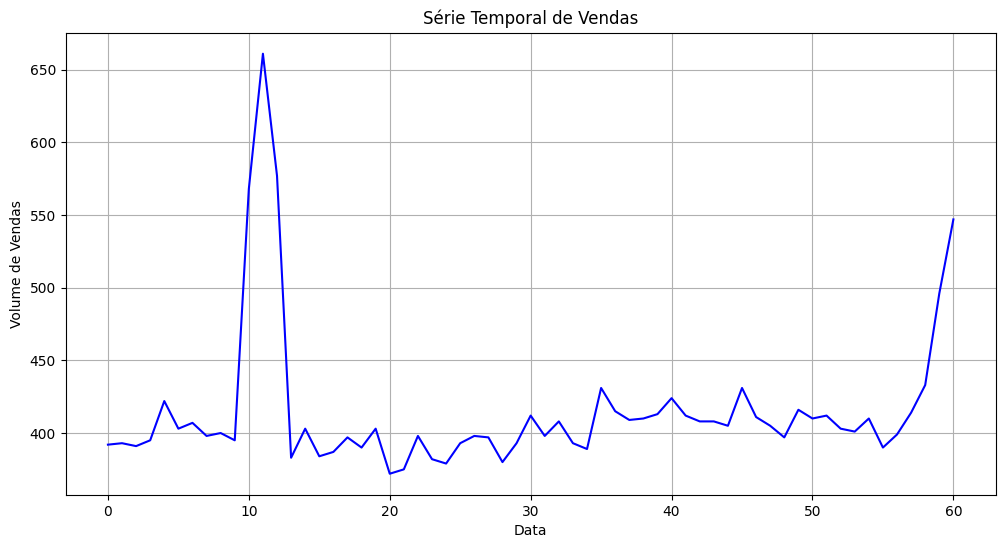

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Vendas'], color='blue')
plt.title('S√©rie Temporal de Vendas')
plt.xlabel('Data')
plt.ylabel('Volume de Vendas')
plt.grid(True)
plt.show()

## An√°lise de correla√ß√£o

### Subtask:
An√°lise de correla√ß√£o


**Reasoning**:
Calculate and display the correlation matrix for the numerical columns and visualize it using a heatmap to understand the relationships between variables, including potential multicollinearity.



=== Matriz de Correla√ß√£o ===


Ano   M√™s   Dia  Vendas  Dia_da_Semana_Segunda  \
Ano                      NaN   NaN   NaN     NaN                    NaN   
M√™s                      NaN  1.00 -0.03    0.03                   0.01   
Dia                      NaN -0.03  1.00    0.00                   0.01   
Vendas                   NaN  0.03  0.00    1.00                  -0.17   
Dia_da_Semana_Segunda    NaN  0.01  0.01   -0.17                   1.00   
Dia_da_Semana_Ter√ßa      NaN -0.04 -0.03   -0.12                  -0.16   
Dia_da_Semana_Quarta     NaN -0.04  0.02   -0.11                  -0.16   
Dia_da_Semana_Quinta     NaN -0.04  0.07   -0.10                  -0.16   
Dia_da_Semana_Sexta      NaN  0.05 -0.05    0.13                  -0.16   
Final_de_Semana_S√°bado   NaN  0.05  0.00    0.28                  -0.16   
Final_de_Semana_Domingo  NaN  0.01 -0.03    0.09                  -0.15   
Feriado                  NaN  0.14 -0.11    0.33                  -0.10   
Fim de Semana            NaN  0.05 -0.02    0.29                  -0.24   

                         Dia_da_Semana_Ter√ßa  Dia_da_Semana_Quarta  \
Ano                                      NaN                   NaN   
M√™s                                    -0.04                 -0.04   
Dia                                    -0.03                  0.02   
Vendas                                 -0.12                 -0.11   
Dia_da_Semana_Segunda                  -0.16                 -0.16   
Dia_da_Semana_Ter√ßa                     1.00                 -0.17   
Dia_da_Semana_Quarta                   -0.17                  1.00   
Dia_da_Semana_Quinta                   -0.17                 -0.17   
Dia_da_Semana_Sexta                    -0.17                 -0.17   
Final_de_Semana_S√°bado                 -0.17                 -0.17   
Final_de_Semana_Domingo                -0.16                 -0.16   
Feriado                                -0.11                  0.08   
Fim de Semana                          -0.26                 -0.26   

                         Dia_da_Semana_Quinta  Dia_da_Semana_Sexta  \
Ano                                       NaN                  NaN   
M√™s                                     -0.04                 0.05   
Dia                                      0.07                -0.05   
Vendas                                  -0.10                 0.13   
Dia_da_Semana_Segunda                   -0.16                -0.16   
Dia_da_Semana_Ter√ßa                     -0.17                -0.17   
Dia_da_Semana_Quarta                    -0.17                -0.17   
Dia_da_Semana_Quinta                     1.00                -0.17   
Dia_da_Semana_Sexta                     -0.17                 1.00   
Final_de_Semana_S√°bado                  -0.17                -0.17   
Final_de_Semana_Domingo                 -0.16                -0.16   
Feriado                                 -0.11                 0.08   
Fim de Semana                           -0.26                -0.26   

                         Final_de_Semana_S√°bado  Final_de_Semana_Domingo  \
Ano                                         NaN                      NaN   
M√™s                                        0.05                     0.01   
Dia                                        0.00                    -0.03   
Vendas                                     0.28                     0.09   
Dia_da_Semana_Segunda                     -0.16                    -0.15   
Dia_da_Semana_Ter√ßa                       -0.17                    -0.16   
Dia_da_Semana_Quarta                      -0.17                    -0.16   
Dia_da_Semana_Quinta                      -0.17                    -0.16   
Dia_da_Semana_Sexta                       -0.17                    -0.16   
Final_de_Semana_S√°bado                     1.00                    -0.16   
Final_de_Semana_Domingo                   -0.16                     1.00   
Feriado                                    0.26                    -0.10   
Fim de Se

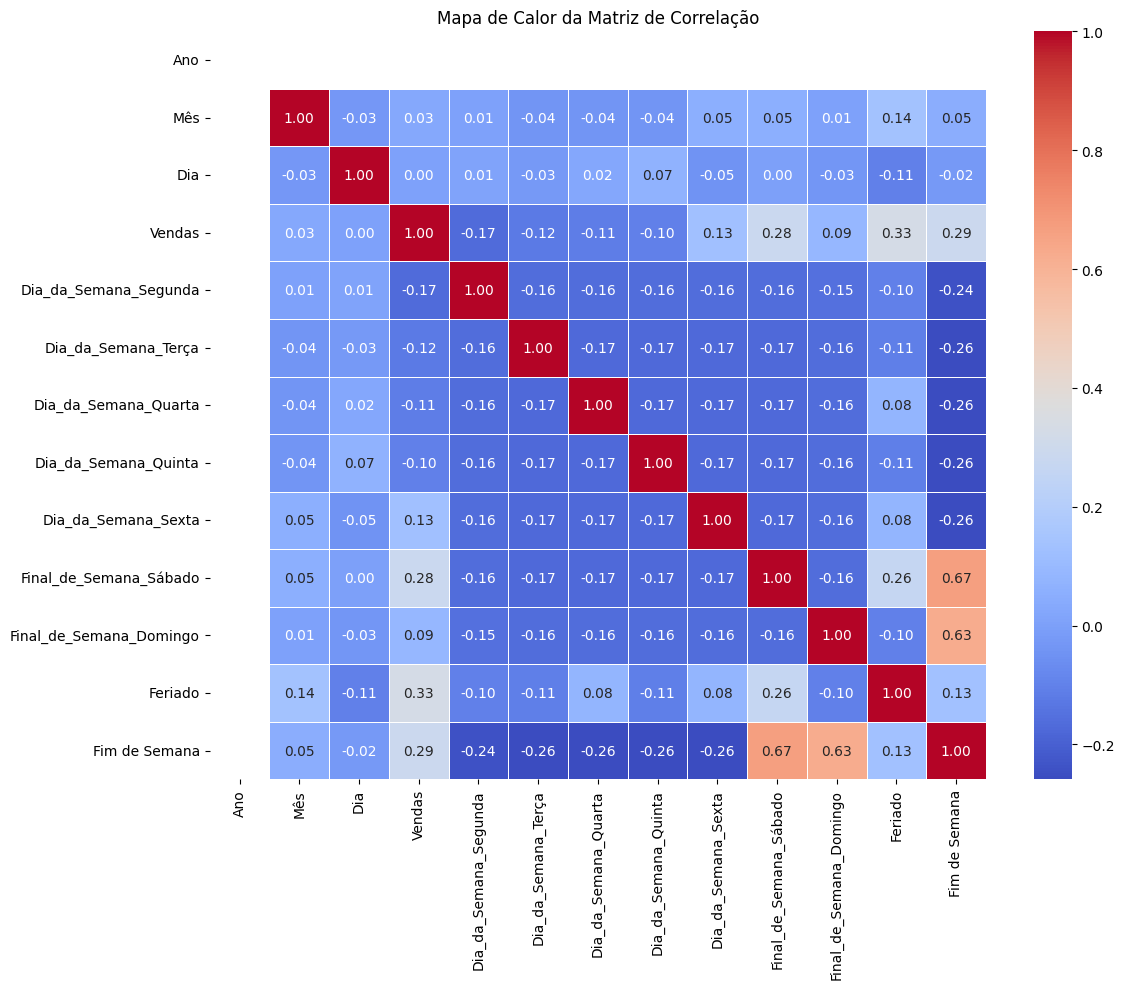

In [ ]:
# Calculate the correlation matrix for numerical columns
df_numeric = df.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()

# Display the correlation matrix, rounded for readability
print("=== Matriz de Correla√ß√£o ===")
display(correlation_matrix.round(2))

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor da Matriz de Correla√ß√£o')
plt.tight_layout()
plt.show()

## An√°lise de vari√°veis categ√≥ricas vs vendas

### Subtask:
Analisar como vari√°veis categ√≥ricas (como dia da semana, m√™s, feriado) impactam as vendas.


**Reasoning**:
Create box plots to visualize the distribution of 'Vendas' across different categorical variables as requested, focusing on the impact of each category on sales.



=== Box Plots: Impacto de Vari√°veis Categ√≥ricas Bin√°rias nas Vendas ===


/tmp/ipython-input-17-1293548705.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['Vendas'], palette='viridis')


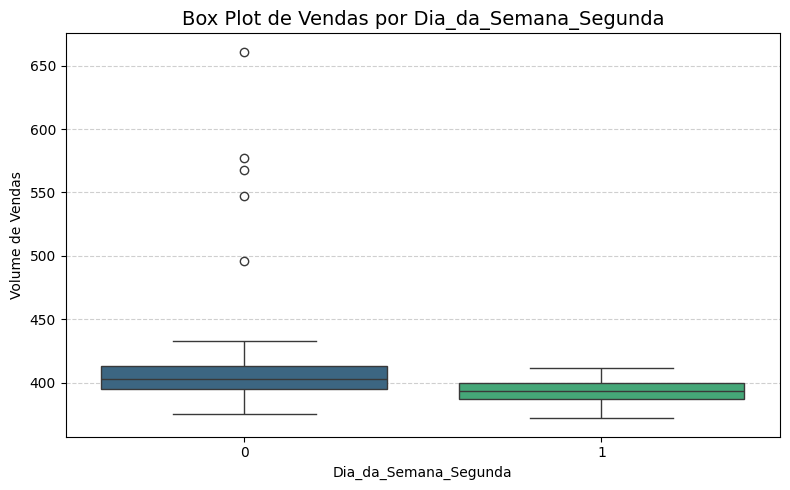

/tmp/ipython-input-17-1293548705.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['Vendas'], palette='viridis')


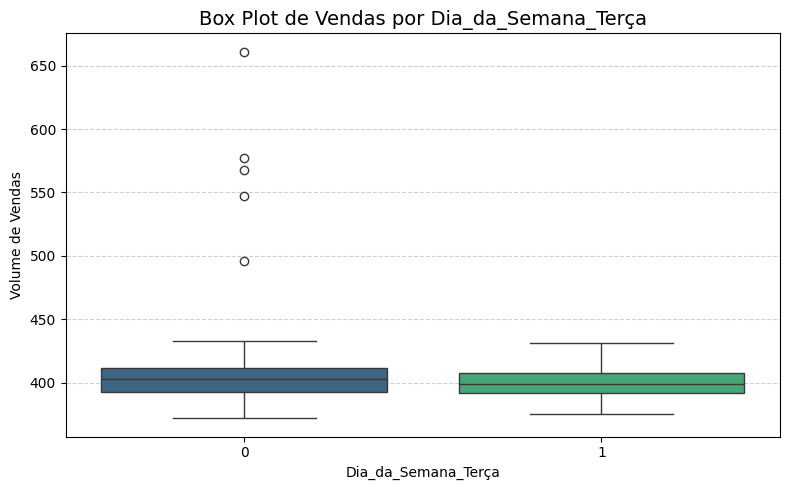

/tmp/ipython-input-17-1293548705.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['Vendas'], palette='viridis')


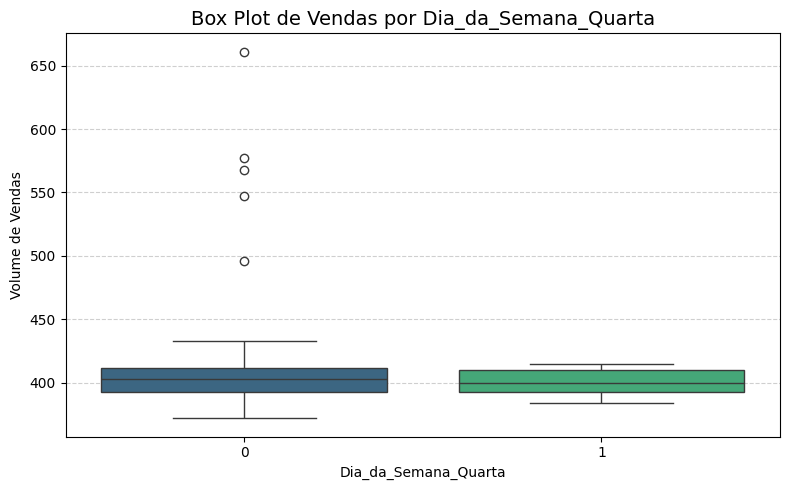

/tmp/ipython-input-17-1293548705.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['Vendas'], palette='viridis')


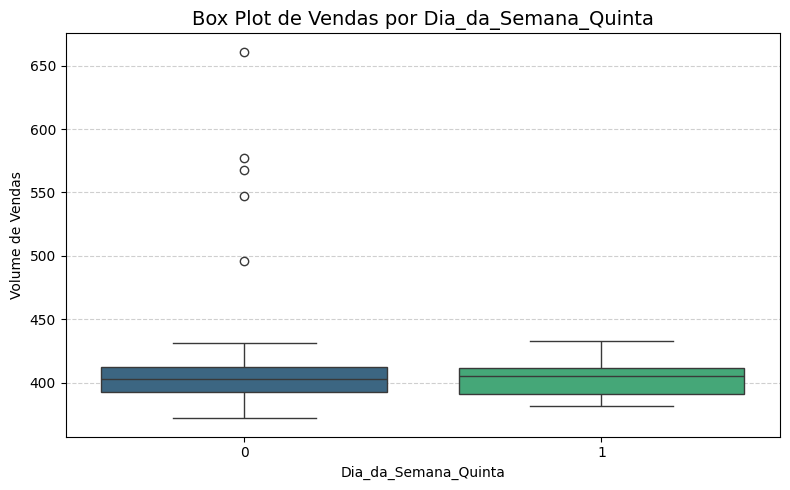

/tmp/ipython-input-17-1293548705.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['Vendas'], palette='viridis')


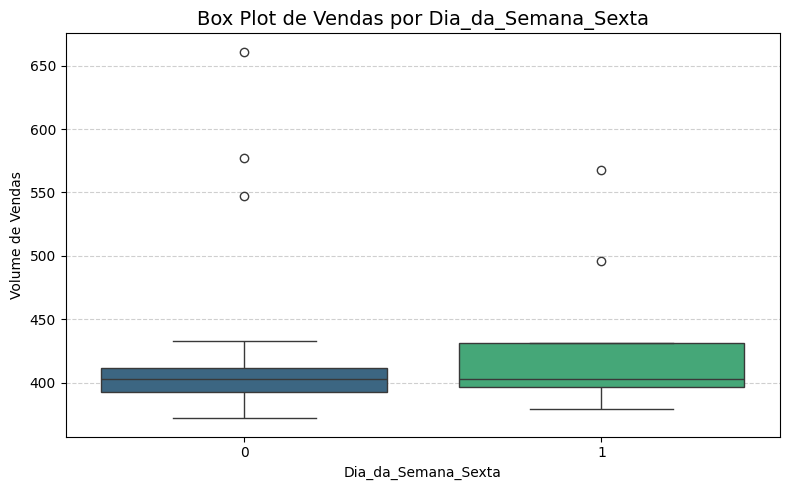

/tmp/ipython-input-17-1293548705.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['Vendas'], palette='viridis')


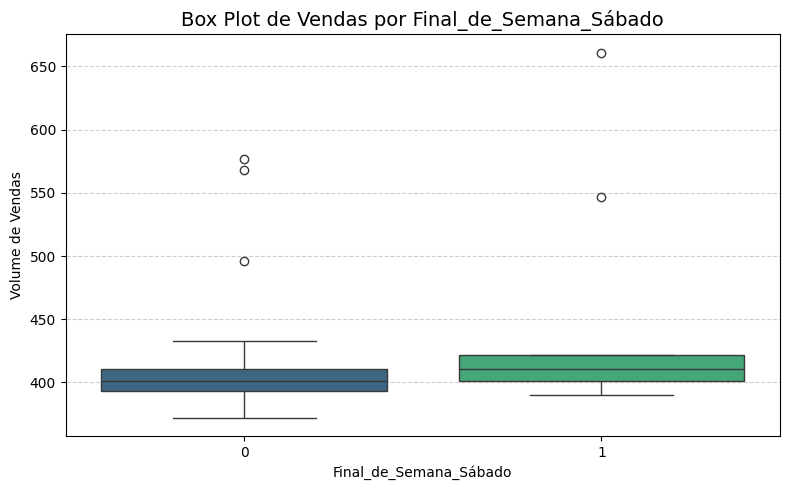

/tmp/ipython-input-17-1293548705.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['Vendas'], palette='viridis')


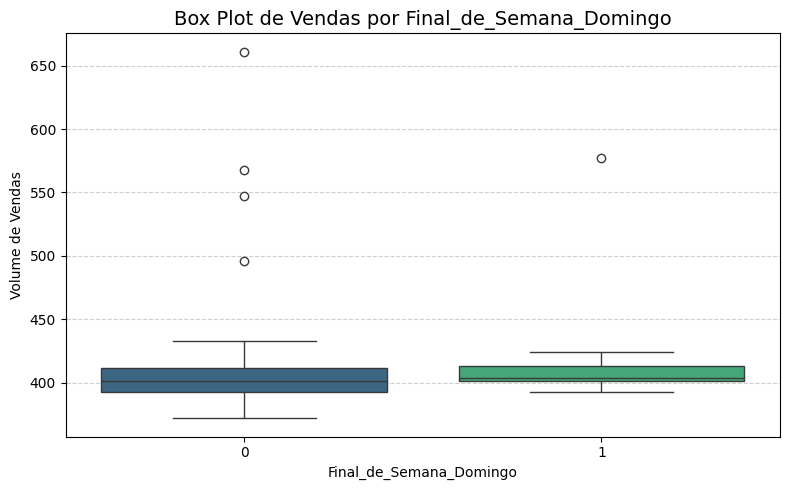

/tmp/ipython-input-17-1293548705.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['Vendas'], palette='viridis')


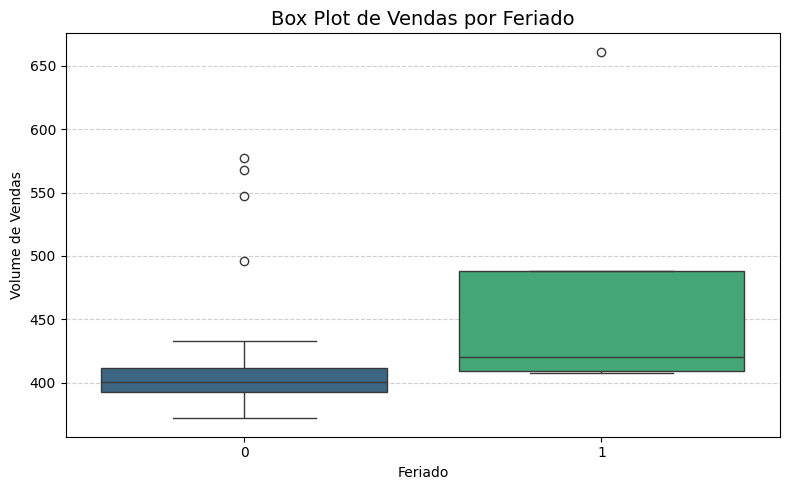

/tmp/ipython-input-17-1293548705.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['Vendas'], palette='viridis')


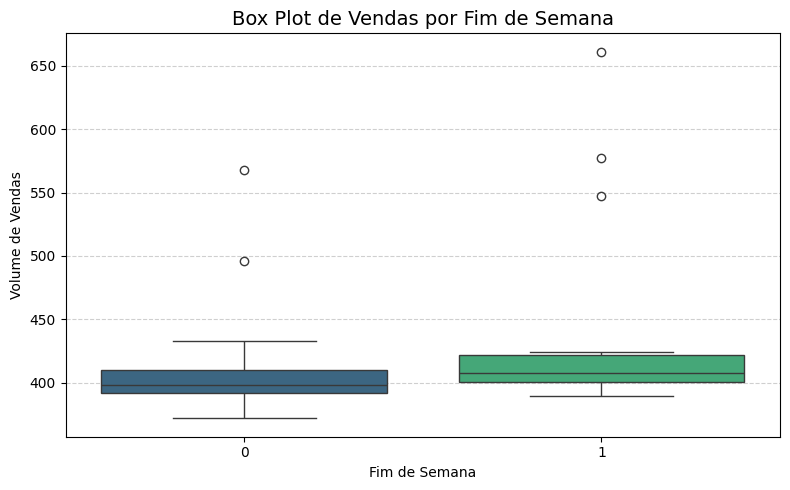

/tmp/ipython-input-17-1293548705.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['M√™s'], y=df['Vendas'], palette='viridis')



=== Box Plots: Impacto de M√™s e Ano nas Vendas ===


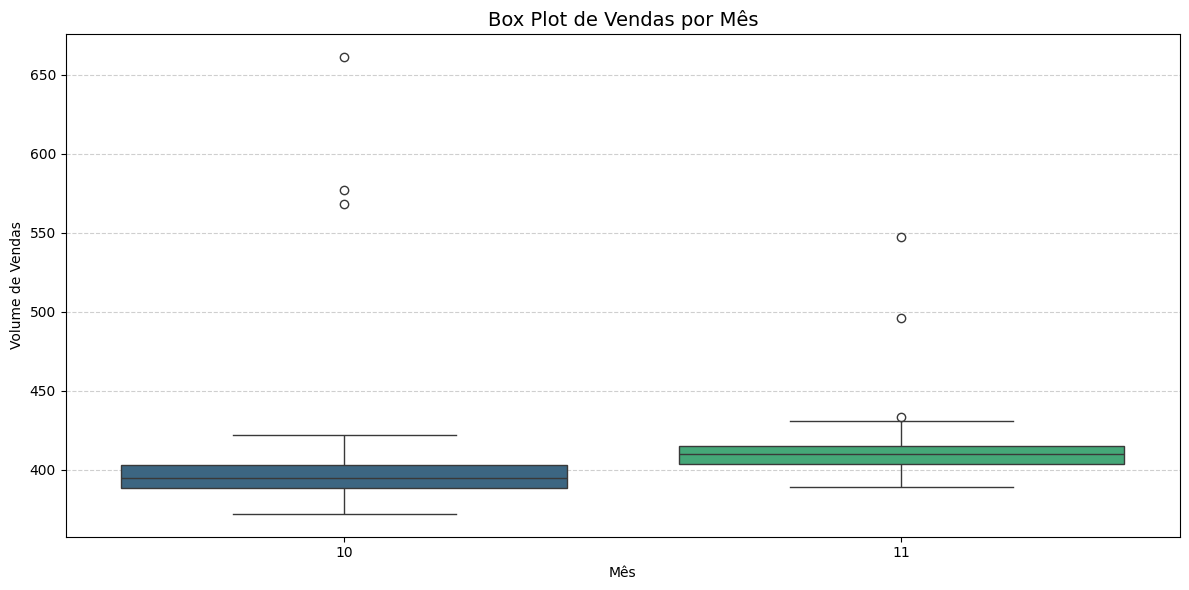

/tmp/ipython-input-17-1293548705.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Ano'], y=df['Vendas'], palette='viridis')


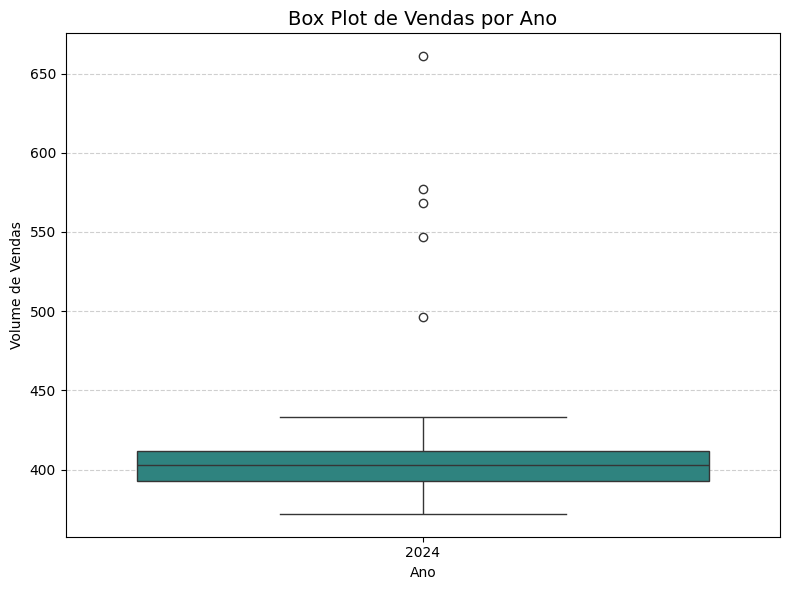

In [ ]:
# Define the list of categorical columns to visualize
categorical_cols_to_plot = [
    'Dia_da_Semana_Segunda', 'Dia_da_Semana_Ter√ßa', 'Dia_da_Semana_Quarta',
    'Dia_da_Semana_Quinta', 'Dia_da_Semana_Sexta', 'Final_de_Semana_S√°bado',
    'Final_de_Semana_Domingo', 'Feriado', 'Fim de Semana'
]

# Create box plots for binary categorical variables (Day of Week, Weekend, Holiday)
print("=== Box Plots: Impacto de Vari√°veis Categ√≥ricas Bin√°rias nas Vendas ===")
for col in categorical_cols_to_plot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col], y=df['Vendas'], palette='viridis')
    plt.title(f'Box Plot de Vendas por {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Volume de Vendas')
    plt.xticks([0, 1], ['0', '1']) # Assuming 0/1 encoding
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Create box plots for 'M√™s' and 'Ano'
print("\n=== Box Plots: Impacto de M√™s e Ano nas Vendas ===")

# Box plot for 'M√™s'
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['M√™s'], y=df['Vendas'], palette='viridis')
plt.title('Box Plot de Vendas por M√™s', fontsize=14)
plt.xlabel('M√™s')
plt.ylabel('Volume de Vendas')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Box plot for 'Ano'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Ano'], y=df['Vendas'], palette='viridis')
plt.title('Box Plot de Vendas por Ano', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Volume de Vendas')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()